# INFO370 Problem Set: Image rotation

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1 Matrix multiplication

![matrix_multiplication](matrix_multiplication.jpg)

In [215]:
T = np.array([[0,7],
              [5,3]])

In [216]:
A = np.array([[1,0],
              [0,-1]])

In [217]:
#a)

T@A

array([[ 0, -7],
       [ 5, -3]])

In [218]:
B = np.array([[1,0],
              [0,-1],
            [0,1]])
B

array([[ 1,  0],
       [ 0, -1],
       [ 0,  1]])

##### b)
T@B
This operation is not valid, since the number of columns in the first matrix is not equal to the number of rows in the second matrix.

In [219]:
C = np.array([[1,0,0],
              [0,-1,-1]])
C

array([[ 1,  0,  0],
       [ 0, -1, -1]])

In [220]:
#c)

T@C

array([[ 0, -7, -7],
       [ 5, -3, -3]])

### 2 Rotate Crazy Hat

#### 2.1

In [268]:
#1
ch = pd.read_csv("../Data/all-data/crazy-hat.tsv", sep="\t") 
ch.head()

,x,y,group
0,0,22,outline
1,16,-18,outline
2,-16,-18,outline
3,0,22,outline
4,-3,7,leye


#### 2.2

In [269]:
X = ch[["x", "y"]].values
groups = ch.group.values
X,groups

(array([[  0,  22],
        [ 16, -18],
        [-16, -18],
        [  0,  22],
        [ -3,   7],
        [ -3,  14],
        [  2,   7],
        [  2,  14],
        [-11, -10],
        [ -7, -17],
        [ -3, -10],
        [  2, -17],
        [  6, -10],
        [ 10, -17],
        [ 12, -13]]),
 array(['outline', 'outline', 'outline', 'outline', 'leye', 'leye', 'reye',
        'reye', 'mouth', 'mouth', 'mouth', 'mouth', 'mouth', 'mouth',
        'mouth'], dtype=object))

#### 2.3

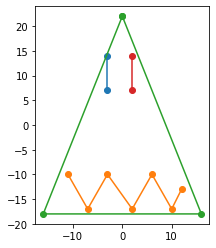

In [270]:
unique_group = np.unique(groups)
ax = plt.axes() 
for i in unique_group:
    a = X[groups == i]
    ax.set_aspect("equal") 
    ax.plot(a[:,0],a[:,1], marker="o")

#### 2.4

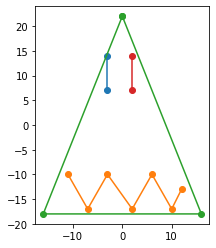

In [271]:
def plot(X, groups):
    ax = plt.axes() 
    for i in unique_group:
        a = X[groups == i]
        ax.set_aspect("equal") 
        ax.plot(a[:,0],a[:,1], marker="o")
plot(X,groups)

#### 2.5

In [272]:
def Rot(alpha):
    a = alpha*np.pi/180
    ca = np.cos(a)
    sa = np.sin(a)
    r = np.array([[ca, -sa], [sa, ca]])
    return r
#Rot(0)
Rot(45)

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

#### 2.6

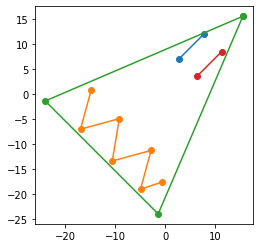

In [273]:
plot(X @ Rot(45), groups)

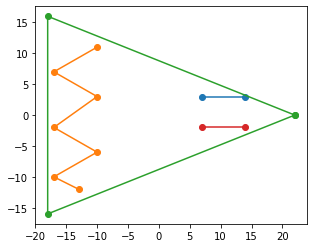

In [274]:
plot(X @ Rot(90), groups)

### 3 Linear transformation of images

#### 3.1.1

In [277]:
Fx = np.array([[-1,0],
              [0,1]])

In [278]:
A = np.array([[0,0],
              [0,2],
             [1,1]])

In [230]:
A@Fx

array([[ 0,  0],
       [ 0,  2],
       [-1,  1]])

#### 3.1.2
During the matrix mulitiplication, the operation is valid when the number of columns for the first matrix should be equal to the number of rows for the second the matrix; thus the first matrix which is 3 x 2 cannot multipled by 2 x 3 matrix. Since the result of matrix is 3 x 2, thus we need to find the rows of second matrix with same number of columns as the result. Thus, we need 2 x 2 matrix for Fx.

#### 3.1.3

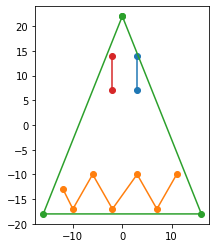

In [231]:
plot(X @ Fx, groups)

#### 3.2.1

In [264]:
def Sy(factor):
    matrix = np.array([[1,0], 
                       [0,factor]])
    return matrix

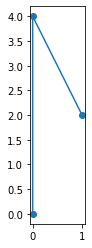

In [265]:
# stretch by 2
A = np.array([[0,0], [0,2], [1,1]]) @ Sy(2)
ax = plt.axes()
ax.plot(A[:,0], A[:,1], marker='o')
ax.set_aspect("equal")
plt.show()

#### 3.2.2

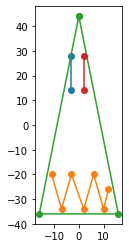

In [279]:
plot(X @ Sy(2), groups)

#### 3.2.3

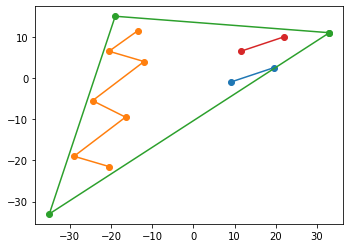

In [234]:
ax.set_aspect("equal")
A = X @ Rot(-45) @ Fx @ Sy(2) @ Rot(45)
plot(A, groups)

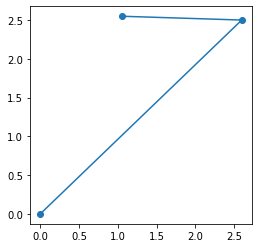

In [235]:
A = np.array([[0,0], [0,2], [1,1]]) 
test = A @ Rot(-30) @ Fx @ Sy(2) @ Rot(30)
ax = plt.axes()
ax.plot(test[:,0], test[:,1], marker='o') 
ax.set_aspect("equal")
plt.show()

#### 4.1 (a)

shape: (432, 482)


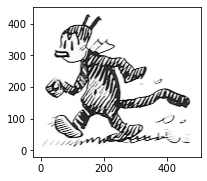

In [236]:
from matplotlib.image import imread 
import matplotlib.pyplot as plt 
import numpy as np

img = imread('../Data/all-data/krazy-kat.png')
print("shape:", img.shape)
xx, yy = np.meshgrid(np.arange(img.shape[1]),
np.arange(img.shape[0], 0, -1)) 
X = np.column_stack((xx.ravel(), yy.ravel()))
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=img.ravel(), marker='.', cmap="Greys_r") 
ax.set_aspect('equal')
plt.show()

In [237]:
print(X)

[[  0 432]
 [  1 432]
 [  2 432]
 ...
 [479   1]
 [480   1]
 [481   1]]


#### 4.1 (b)
The matrix X is the image that takes two a sequence of 1-D arrays and stacks them as columns to make a single 2-D array. 

#### 4.1 (c)
The X has a total of 208224 rows, which is the pixel coordinates and is conceptually the same as vertex coordinates
for wireframe image.

In [238]:
len(X)

208224

#### 4.1 (d)
The first column of X denotes the horizontal position, the column of the original image
matrix. The second column is the vertical position, the image row. It is 1 for each pixel in the first row, 2 for each pixel in the second row and so forth. For the three lines in the graph, the 36, 37 ,38 denotes the horizontal position from 36 to 38 image column. The 430 means the vertical position stays the 430 image row.

#### 4.1 (e)
The img matrix denoted the gray value pixels. When the number is closer to 1, it means that the area is closer to light. When the area is closer to 0, it means that the color is closer to dark. For the value (0.9882353, 0.99215686, 0.99607843, 1), it means the gray intensity.

#### 4.2

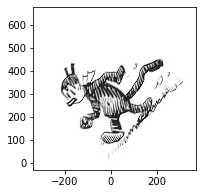

In [239]:
A = X @ Rot(-45)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(A[:,0], A[:,1], c=img.ravel(), marker='.', cmap="Greys_r") 
ax.set_aspect('equal')
plt.savefig("rotate1")

![krazy-kat rotate1](rotate1.png)

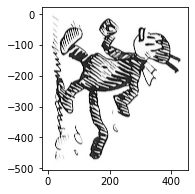

In [240]:
B = X @ Rot(90)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(B[:,0], B[:,1], c=img.ravel(), marker='.', cmap="Greys_r") 
ax.set_aspect('equal')
plt.savefig("rotate2")

![krazy-kat rotate2](rotate2.png)

#### 4.3

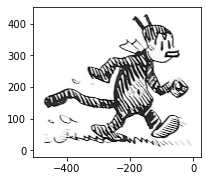

In [241]:
C = X @ Fx
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(C[:,0], C[:,1], c=img.ravel(), marker='.', cmap="Greys_r") 
ax.set_aspect('equal')
plt.savefig("rotate3")

![krazy-kat rotate3](rotate3.png)

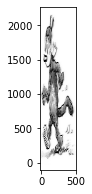

In [242]:
D = X @ Sy(5)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1,1,1)
ax.scatter(D[:,0], D[:,1], c=img.ravel(), marker='.', cmap="Greys_r") 
ax.set_aspect('equal')
plt.savefig("rotate4")

![krazy-kat rotate4](rotate4.png)

### 5 Linear Regression

#### 5.1

In [243]:
bdata = pd.read_csv("../Data/all-data/boston.csv.bz2", sep="\t") 
bdata.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### 5.2

In [248]:
from pandas import DataFrame
import statsmodels.formula.api as smf
model1 = smf.ols(formula='medv ~ rm+lstat+zn', data=bdata).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     297.3
Date:                Sun, 24 Apr 2022   Prob (F-statistic):          6.65e-111
Time:                        23:26:44   Log-Likelihood:                -1581.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     502   BIC:                             3189.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4606      3.171     -0.461      0.645      -7.691       4.770
rm             5.0455      0.446     11.324      0.000       4.170       5.921
lstat         -0.6240      0.046    -13.644      0.000      -0.714      -0.534
zn             0.0158      0.012      1.359      0.175      -0.007       0.039
==============================================================================
Omnibus:                      150.432   Durbin-Watson:                   0.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.567
Skew:                           1.376   Prob(JB):                    1.34e-106
Kurtosis:                       6.943   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 5.3

In [281]:
ones = np.ones(506)
treat_X = bdata[["rm", "lstat", "zn"]].values
X = np.column_stack((ones, treat_X))

#### 5.4

In [282]:
y = bdata[["medv"]].values

#### 5.5

In [283]:
np.linalg.inv(X.T@X)@X.T@y

array([[-1.46057734],
       [ 5.04554308],
       [-0.62401045],
       [ 0.01580778]])

The results of my computed β estimate is as same as the result from the linear regression table.